In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_time(time_str):
    """
    Extract time from file name
    """
    start = time_str.find('-')
    end = time_str.find('.csv')
    time_str = time_str[start + 1:end]
    time = time_str.split('_')
    y, m, d, h, mi = time
    formattted = y + '.' + m + '.' + d + ' ' + h + ':' + mi
    return formattted

In [3]:
def csv_creater(path):
    files = os.listdir(path)
    names_set = set()
    output_df = pd.DataFrame()
    for f in files:
        cur_time = extract_time(f)
        output_df[cur_time] = 0
        df = pd.read_csv(path + '/' + f)
        existed_names = output_df.index.values
        for row in df.iterrows():
            name = row[1]["name"]
            vote = int(row[1]["vote"])
            if name not in existed_names:
                output_df.loc[name] = 0
            output_df.loc[name, cur_time] = vote
    return output_df

In [4]:
data = csv_creater("../get_data/2020_data")
data

,2020.12.18 16:19,2020.12.18 16:39,2020.12.18 16:59,2020.12.18 17:19,2020.12.18 17:39,2020.12.18 17:59,2020.12.18 18:19,2020.12.18 18:39,2020.12.18 18:59,2020.12.18 19:20
剑网3制作人郭炜炜,601995,631637,668837,706696,740335,766387,789137,809558,828011,843889
UziQAQ,425238,430616,437151,443615,449935,455466,460481,466965,475256,482514
李佳琦Austin,357719,360018,362795,365370,368147,370362,372462,374804,377319,379628
一条小团团OvO,207959,209976,212231,214349,216634,218744,220919,223033,225110,227114
薇娅viyaaa,188809,190530,191789,192841,194390,195724,196820,199015,201861,204899
李子柒,183819,184901,185848,186789,187726,188727,189722,190869,192052,193035
iG_TheShy,158978,160195,161657,162796,164053,165043,165942,166957,168040,169259
old先,137517,140272,141905,143563,145382,147057,148922,150756,152479,154224
韦神_GODV,126155,127208,128232,129803,130772,131386,132159,132530,133273,135035
JackeyLoveasdzz,115038,115659,116157,116526,117186,117717,118510,119153,119661,120507


In [7]:
def plotting(pd_frame):
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    # figure size
    plt.figure(figsize=(18, 12))
    names = pd_frame.index.values.tolist()
    x = pd_frame.columns.values.tolist()
    l = len(pd_frame)
    for i in range(l):
        y = pd_frame[i:i + 1].values[0]
        plt.plot(x, y, label = names[i])
        # data label
        for a, b in zip(x, y):
            plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation="70")
    plt.legend(loc = "upper left")
    plt.show()

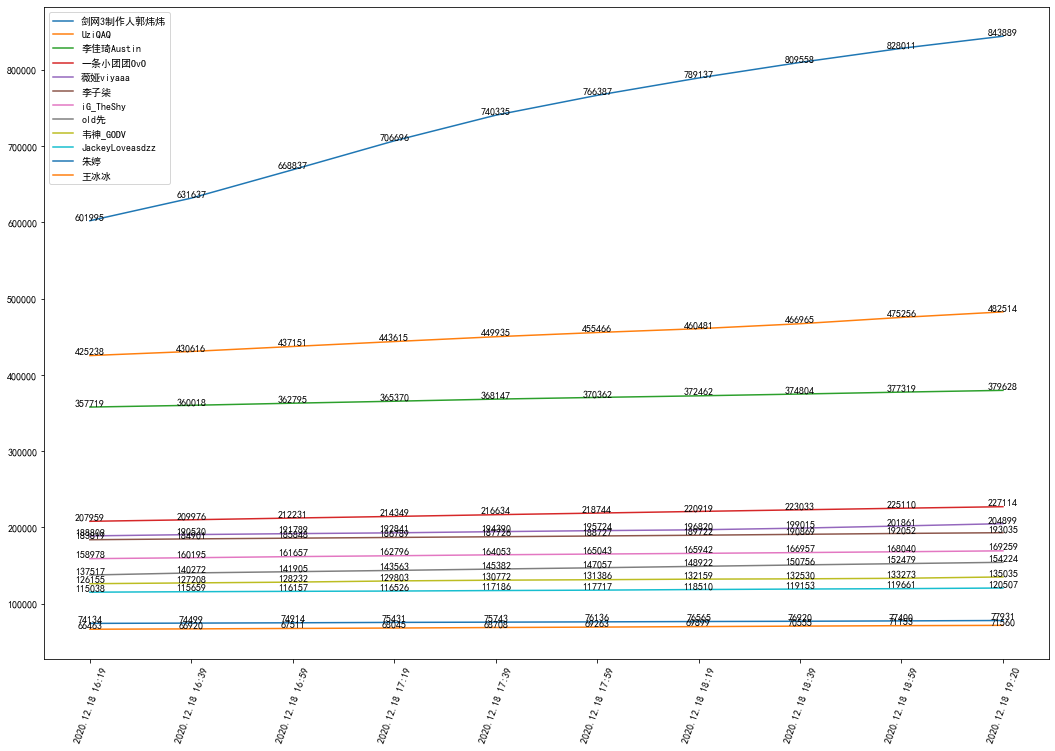

In [8]:
plotting(data)